<a href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/challenges/challenge-one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

---

# 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

In [ ]:
from seaborn import pairplot
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn
import numpy.linalg as LA
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
FFILE = './data_banknote_authentication.txt'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip"
        !unzip "banknote+authentication"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip"
    !unzip "banknote+authentication"

Either the file is missing or not readable, download it
--2024-03-03 10:17:30--  https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘banknote+authentication.zip’

banknote+authentica     [ <=>                ]  45.47K  --.-KB/s    in 0.1s    

2024-03-03 10:17:30 (469 KB/s) - ‘banknote+authentication.zip’ saved [46562]

Archive:  banknote+authentication.zip
 extracting: data_banknote_authentication.txt  


In [ ]:
# Load the dataset using Pandas
data = pd.read_csv('data_banknote_authentication.txt', sep = ',', header = None, names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])

df = pd.DataFrame(data)

print(f'NULL values: \n{df.isnull().sum()}')

NULL values: 
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [ ]:
print(df.shape)
df

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


It seems that the dataset is sorted basing on the 'class' columns values, so it is needed to shuffle the data.

Without shuffling data, the splitting into train set and test set could lead to wrong results because, for example, it can happen that the entire test set has the observations with class = 0 or class = 1, which means that the predictions won't be truthful.

In [ ]:
df = df.sample(frac=1,random_state=0).reset_index(drop=True) # random shufle
df.head()

,variance,skewness,curtosis,entropy,class
0,-1.7713,-10.766500,10.21840,-1.00430,1
1,5.1321,-0.031048,0.32616,1.11510,0
2,-2.0149,3.687400,-1.93850,-3.89180,1
3,1.4884,3.627400,3.30800,0.48921,0
4,5.2868,3.257000,-1.37210,1.16680,0


In [ ]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [ ]:
# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last one
X = df.iloc[:, :-1].values

# Labels (y) are taken from the last column
y = df.iloc[:, -1].values

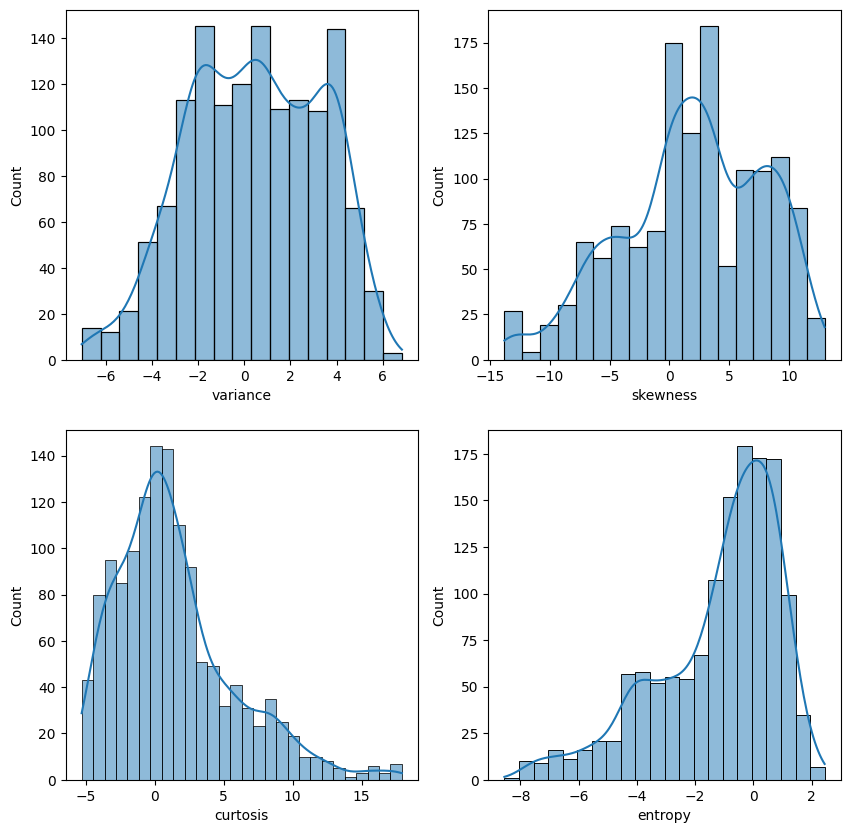

In [ ]:
fig, ax = plt.subplots(2, 2)

sns.histplot(data = df, x = 'variance', kde = True, ax = ax[0, 0])
sns.histplot(data = df, x = 'skewness', kde = True, ax = ax[0, 1])
sns.histplot(data = df, x = 'curtosis', kde = True, ax = ax[1, 0])
sns.histplot(data = df, x = 'entropy', kde = True, ax = ax[1, 1])

fig.set_figwidth(10)
fig.set_figheight(10)
fig.show()

In [ ]:
print(np.unique(y))

[0 1]


610
762


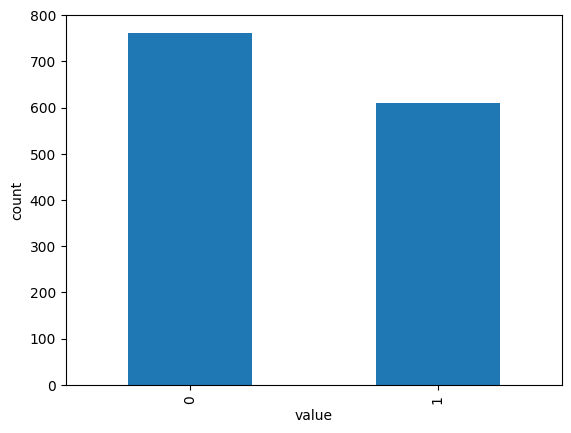

In [ ]:
df['class'].value_counts().plot.bar(xlabel = 'value', ylabel = 'count')

print(len(y[y == 1]))
print(len(y[y == 0]))

There are 610 observations for class = 1 and 762 for class = 0

### Correlation matrix

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,variance,skewness,curtosis,entropy,class
variance,1.00,0.26,-0.38,0.28,-0.72
skewness,0.26,1.00,-0.79,-0.53,-0.44
curtosis,-0.38,-0.79,1.00,0.32,0.16
entropy,0.28,-0.53,0.32,1.00,-0.02
class,-0.72,-0.44,0.16,-0.02,1.00


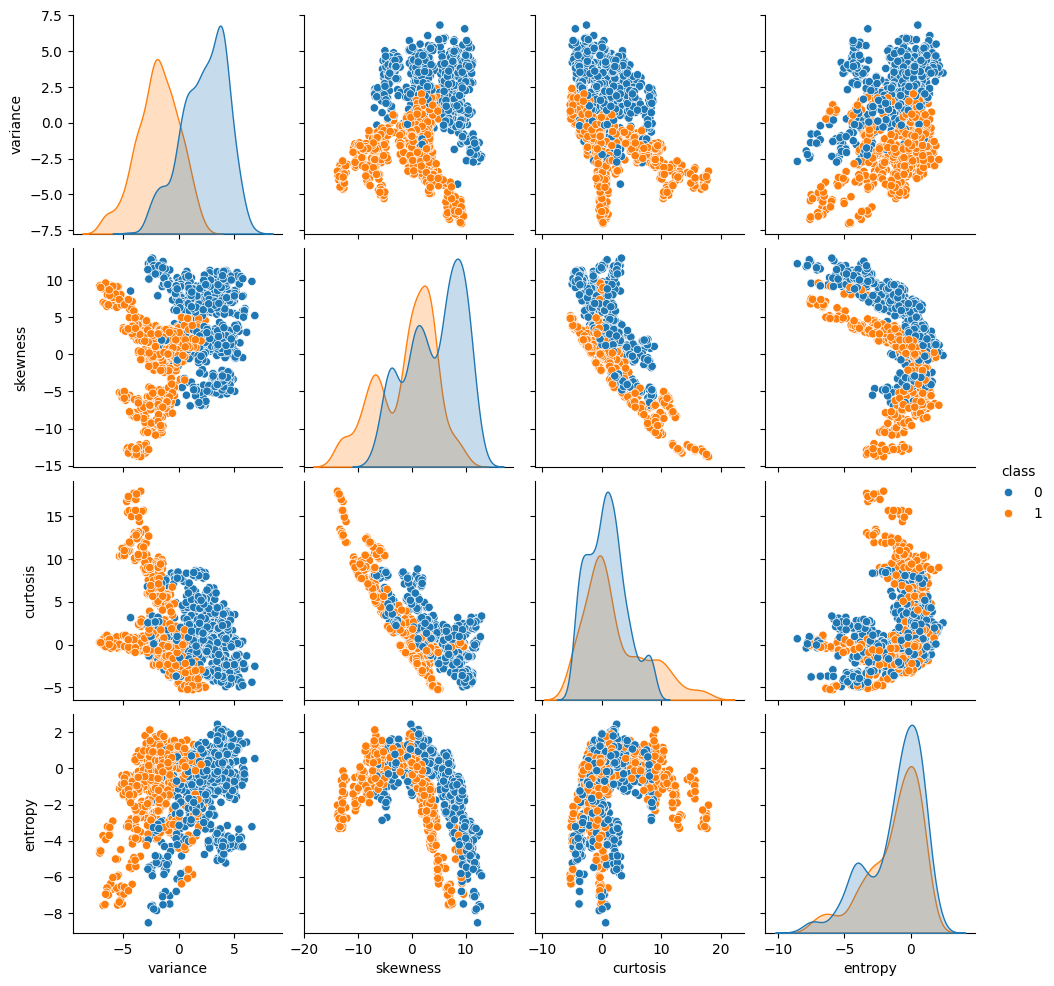

In [ ]:
pairplot(df, hue="class")

---

# 2. Unsupervised Learning



Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

## PCA

In [ ]:
from sklearn import preprocessing
# Rescaling the features
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_scaled

array([[-0.77594917, -2.16278391,  2.04731499,  0.08920688],
       [ 1.65334873, -0.33295243, -0.24868917,  1.09832613],
       [-0.86167171,  0.30084791, -0.77432025, -1.2856312 ],
       ...,
       [ 0.05868431, -0.15730657, -0.83793928,  0.61376368],
       [ 0.55697295, -0.37069157,  0.87573603,  1.07985212],
       [-0.88313754,  1.51697413,  0.28926186, -1.73567343]])

In [ ]:
# Performing Principal Component Analysis (PCA) using sklearn
pca = PCA()

# Fitting the PCA model to the scaled data
pca.fit(X_scaled)

# Transforming the original data to the principal components
projection = pca.transform(X_scaled)

N = X.shape[0]  # Number of data points
nc = X.shape[1]  # Number of features/components

# Calculating the cumulative explained variance ratio
cumulative_variance = np.zeros(nc)
for i in range(nc):
    cumulative_variance[i] = np.sum(pca.explained_variance_ratio_[:i+1])

# Extracting eigenvalues and component indices
eigenvalues = pca.explained_variance_
components  = np.arange(nc) + 1

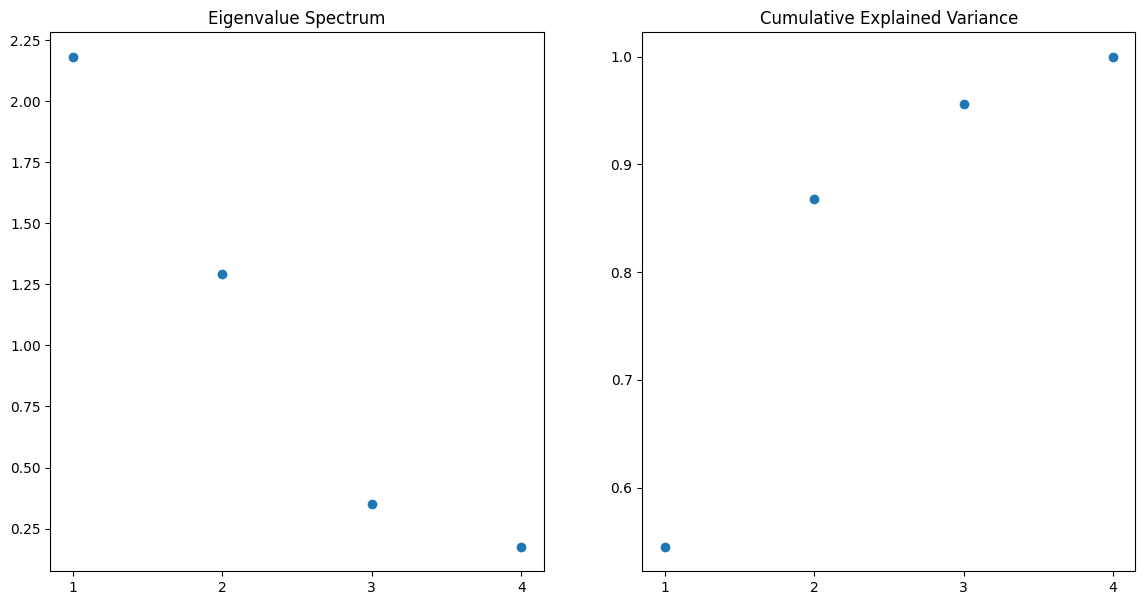

In [ ]:
# Creating subplots
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the Spectrum
ax1.set_title('Eigenvalue Spectrum')
ax1.scatter(components, eigenvalues)
ax1.set_xticks(components)

# Plotting the Cumulative Explained Variance
ax2.set_title('Cumulative Explained Variance')
ax2.scatter(components, cumulative_variance)
ax2.set_xticks(components)

# Displaying the plots
plt.show()

In [ ]:
# Determine the number of components based on different explained variance thresholds.
thresholds_list = [0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999]
num_components_list = []

for threshold in thresholds_list:
    # Find the index where cumulative variance exceeds the threshold
    num_components = np.argmax(cumulative_variance - threshold > 0.) + 1
    num_components_list.append(num_components)

    # Print the threshold and the corresponding number of components
    print(f"Explained Variance Threshold: {threshold}, Number of Components: {num_components}")

Explained Variance Threshold: 0.8, Number of Components: 2
Explained Variance Threshold: 0.85, Number of Components: 2
Explained Variance Threshold: 0.9, Number of Components: 3
Explained Variance Threshold: 0.95, Number of Components: 3
Explained Variance Threshold: 0.97, Number of Components: 4
Explained Variance Threshold: 0.99, Number of Components: 4
Explained Variance Threshold: 0.999, Number of Components: 4


Text(0, 0.5, 'Number of components')

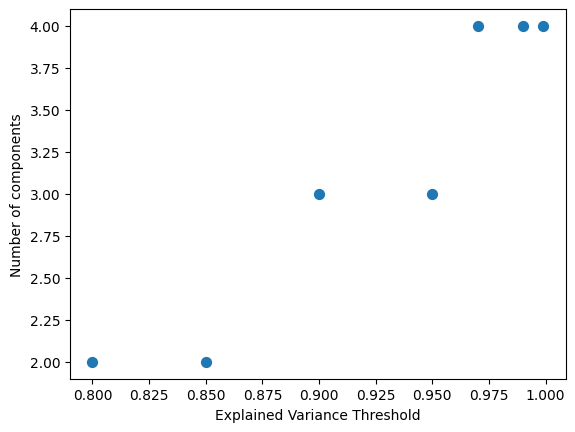

In [ ]:
plt.scatter(thresholds_list, num_components_list, s = 50)
plt.xlabel('Explained Variance Threshold')
plt.ylabel('Number of components')

### PCA using the first two components

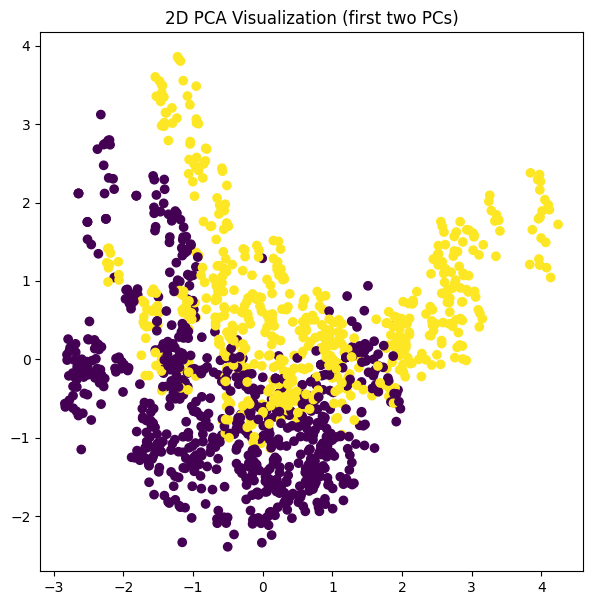

In [ ]:
# Plotting the 2D representation of the dataset using the first two Principal Components (PCs),
# with points colored by their ground truth labels.
fig, ax = plt.subplots(figsize=(7, 7))

# Scatter plot of the dataset in 2D space using the first two Principal Components
ax.scatter(projection[:, 0], projection[:, 1], c=y)

# Setting the title of the plot
ax.set_title('2D PCA Visualization (first two PCs)')

# Displaying the plot
plt.show()

The classes seems to be not linearly separable

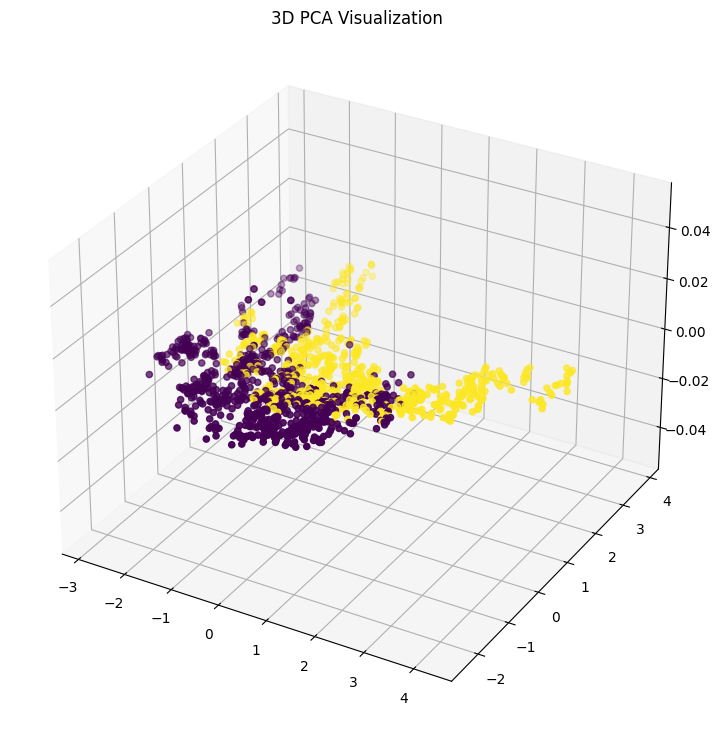

In [ ]:
# Plotting the 3D representation of the dataset using the first two components,
# with points colored by their ground truth labels.
fig = plt.figure(figsize=(9, 9))

# Creating a 3D subplot
ax = fig.add_subplot(projection='3d')

# Scatter plot of the dataset in 3D space using the first two Principal Components
ax.scatter(projection[:, 0], projection[:, 1], c=y)

# Setting the title of the plot
ax.set_title('3D PCA Visualization')

# Displaying the 3D plot
plt.show()

## k-means

In [ ]:
def k_means_internal(k, X, init):
    '''
    Perform k-means clustering.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}
        Type of initialization for k-means algorithm.

    Returns
    -------
    tuple
        z_new : array
            Cluster assignments for each data point.
        L : float
            Final value of the k-means objective function (loss).
        niter : int
            Number of iterations performed.
    '''
    N = X.shape[0]  # number of points
    nc = X.shape[1]  # number of coordinates
    ll = np.arange(k)
    z = np.zeros(N, dtype='int')  # cluster number assigned to each data point
    cent = np.zeros([k, nc])  # coordinates of the cluster centers

    # k-means++
    if init == '++':
        b = np.random.choice(N, 1, replace=False)  # choose the first cluster center at random
        cent[0, :] = X[b, :]
        nchosen = 1  # number of cluster centers already set

        while nchosen < k:
            dist = cdist(cent[:nchosen, :], X)  # distance of each point from the cluster centers
            dmin = np.min(dist, axis=0)  # min distance between point and cluster centers
            prob = dmin**2
            prob = prob / np.sum(prob)

            # choose next center according to the computed prob
            b = np.random.choice(N, 1, replace=False, p=prob)
            cent[nchosen, :] = X[b, :]
            nchosen += 1

    # random initialization
    else:
        b = np.random.choice(N, k, replace=False)  # choose the k centers randomly
        for i in ll:
            cent[i, :] = X[b[i], :]

    dist = cdist(cent, X)  # distance of each point from cluster centers
    z_new = np.argmin(dist, axis=0)  # assign each point to cluster with the closest center
    dmin = np.min(dist, axis=0)
    niter = 0
    L = np.sum(dmin**2)  # loss function evaluation

    while (z_new != z).any():  # until a stable configuration is reached
        z = np.copy(z_new)

        for i in range(k):
            cent[i, :] = np.average(X[z == i, :], axis=0)  # compute cluster centroids

        dist = cdist(cent, X)  # update distances from cluster centers
        z_new = np.argmin(dist, axis=0)  # find cluster with the minimum centroid distance
        dmin = np.min(dist, axis=0)
        L = np.sum(dmin**2)  # loss function evaluation
        niter += 1

    return z_new, L, niter

def k_means(k, X, init='++', n_init=20):
    '''
    Perform k-means clustering with multiple initializations to find the best result.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}, optional
        Type of initialization for k-means algorithm.
    n_init : int, optional
        Number of runs of the algorithm with different initializations.

    Returns
    -------
    tuple
        labels_opt : array
            Cluster assignments for each data point in the best-performing iteration.
        lmin : float
            Loss (objective function) for the best-performing iteration.
    '''
    lmin = float('inf')  # Initialize with a large value
    labels_opt = None

    for i in range(n_init):
        # Run k-means for each initialization
        labels, loss, niter = k_means_internal(k, X, init=init)

        # Check if the current iteration has a lower loss
        if loss < lmin:
            lmin = loss
            labels_opt = labels

    return labels_opt, lmin

In [ ]:
kmeans_labels, l_kmeans = k_means(2, X_scaled, n_init=20)
print(l_kmeans)

3453.284127975091


k-means++

In [ ]:
kmeans_labels_p, l_kmeans_p = k_means(2, X_scaled, init='++', n_init=20)
print(l_kmeans_p)

3453.284127975091


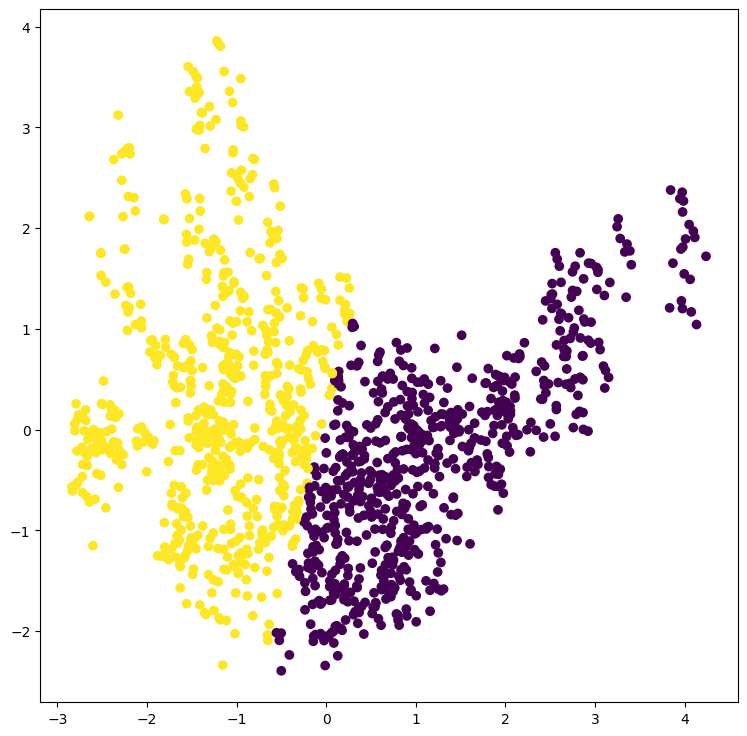

In [ ]:
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(projection[:,0], projection[:,1], c=kmeans_labels)
plt.show()

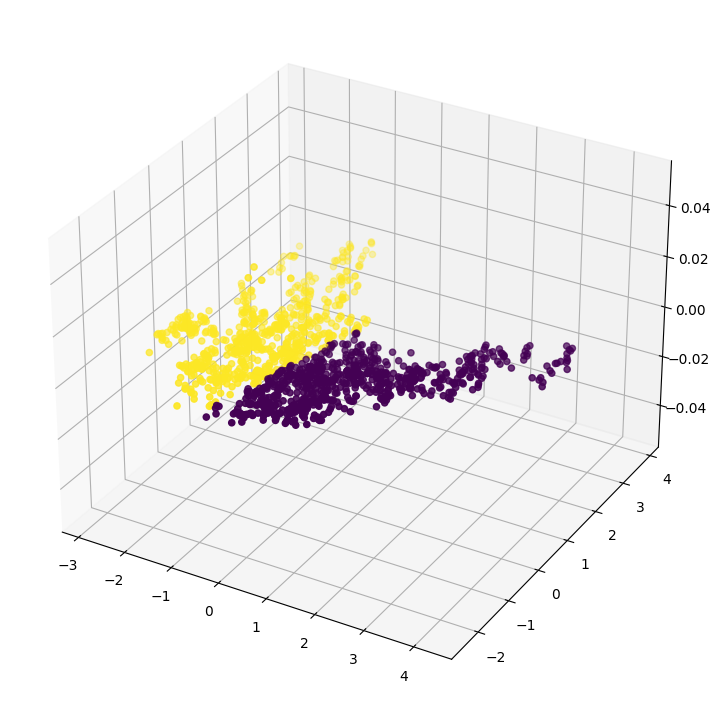

In [ ]:
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], c=kmeans_labels)
plt.show()

## k-means made with scikit-learn

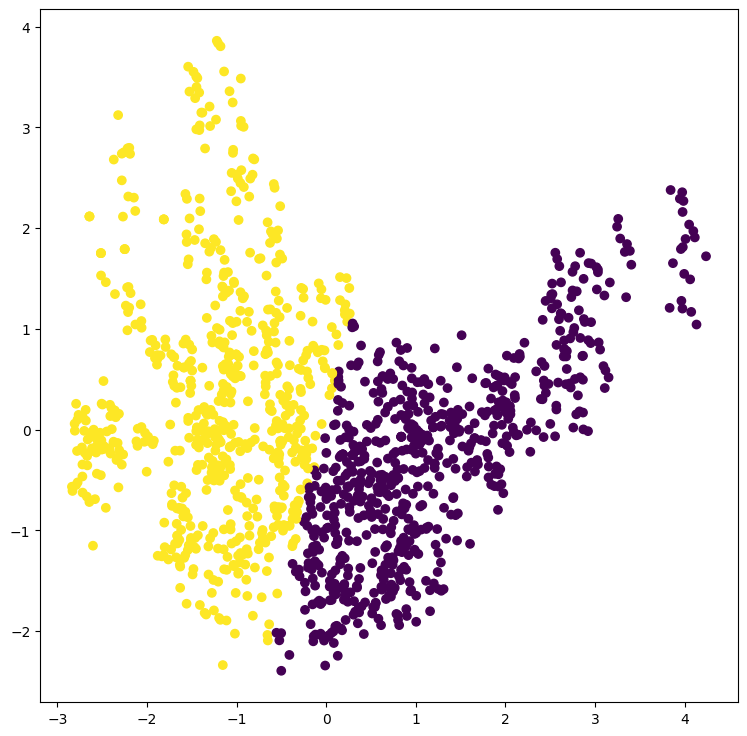

In [ ]:
# k is set to the ground truth number of clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init=20).fit(X_scaled)
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(projection[:,0], projection[:,1], c=kmeans.labels_)
plt.show()

### Cluster Validation

In [ ]:
# Compute the normalized mutual information between the predicted and the ground truth classification
print(f'NMI for kmeans "handmade": {normalized_mutual_info_score(kmeans_labels, y.flatten())}')
print(f'NMI for kmeans made by scikit-learn: {normalized_mutual_info_score(kmeans.labels_, y.flatten())}')

NMI for kmeans "handmade": 0.010995258562412695
NMI for kmeans made by scikit-learn: 0.010642014990965471


Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation).

In our case, since it's equal to 0.01, we can assert that the correlation is low.

### Scree plot

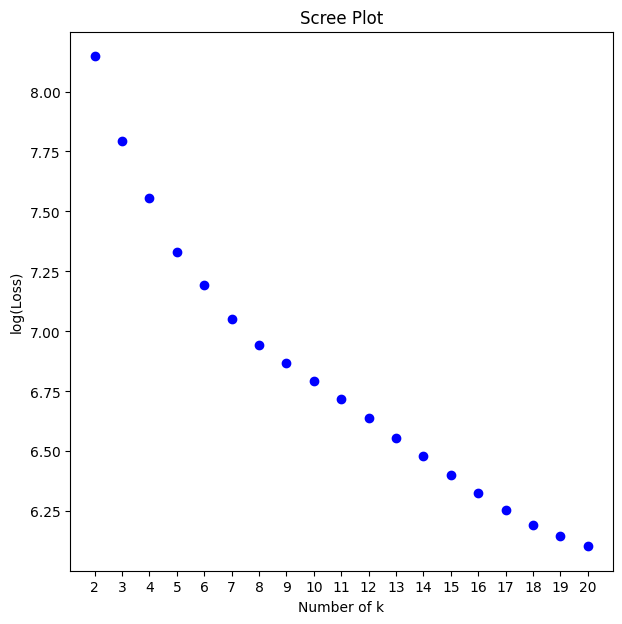

In [ ]:
# scree plot
nk_base = np.arange(2,21) # possible values for k in k-means
loss = np.zeros(nk_base.shape[0])
i = 0
for nk in nk_base:
    ll,l_kmeans = k_means(nk, X_scaled, init='++', n_init=20)
    loss[i] = l_kmeans
    i = i + 1

# Create a scatter plot of k versus the log of the loss
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(nk_base, np.log(loss), c='b')

# Set x-axis ticks to the possible values for k
ax.set_xticks(nk_base)

# Set plot title
ax.set_title('Scree Plot')
ax.set_ylabel('log(Loss)')
ax.set_xlabel('Number of k')

# Display the plot
plt.show()

## t-SNE (t-distributed stochastic neighbor embedding)

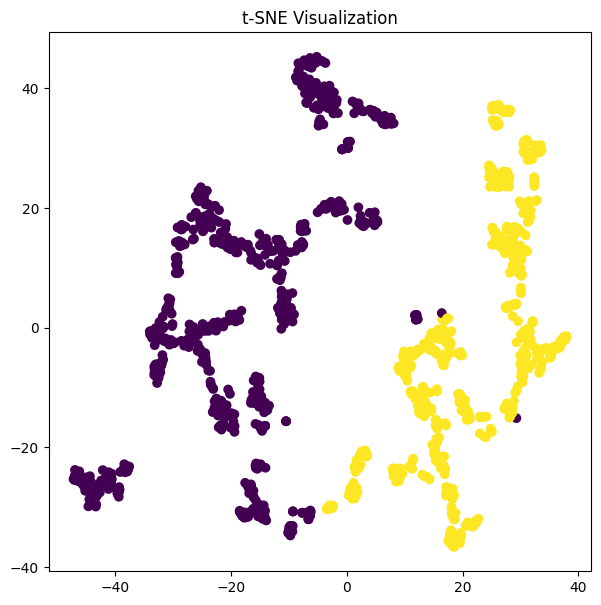

In [ ]:
# Use t-SNE to embed high-dimensional data into a 2D space for visualization
from sklearn.manifold import TSNE

# Embed the data into 2D using t-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X_scaled)

# Create a scatter plot of the embedded data, colored by ground truth labels
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)

# Set plot title
ax.set_title('t-SNE Visualization')

# Display the plot
plt.show()

Usually perplexity is set between 5 and 50, but after several trials with different values, the result obtained using perplexity = 30 is the one which I chose.

## DBSCAN (density-based spatial clustering of application with noise)

In [ ]:
from sklearn.cluster import DBSCAN

eps = np.arange(0.1, 10.2, 0.5)

for e in eps:
# Apply DBSCAN clustering algorithm to the scaled data
  dbscan = DBSCAN(eps=e, min_samples=10).fit(X_scaled)
  print (f"dbscan with eps = {e}:", normalized_mutual_info_score(dbscan.labels_, y.flatten()))

dbscan with eps = 0.1: 0.0
dbscan with eps = 0.6: 0.07754063370446265
dbscan with eps = 1.1: 0.0
dbscan with eps = 1.6: 0.0
dbscan with eps = 2.1: 0.0
dbscan with eps = 2.6: 0.0
dbscan with eps = 3.1: 0.0
dbscan with eps = 3.6: 0.0
dbscan with eps = 4.1: 0.0
dbscan with eps = 4.6: 0.0
dbscan with eps = 5.1: 0.0
dbscan with eps = 5.6: 0.0
dbscan with eps = 6.1: 0.0
dbscan with eps = 6.6: 0.0
dbscan with eps = 7.1: 0.0
dbscan with eps = 7.6: 0.0
dbscan with eps = 8.1: 0.0
dbscan with eps = 8.6: 0.0
dbscan with eps = 9.1: 0.0
dbscan with eps = 9.6: 0.0
dbscan with eps = 10.1: 0.0


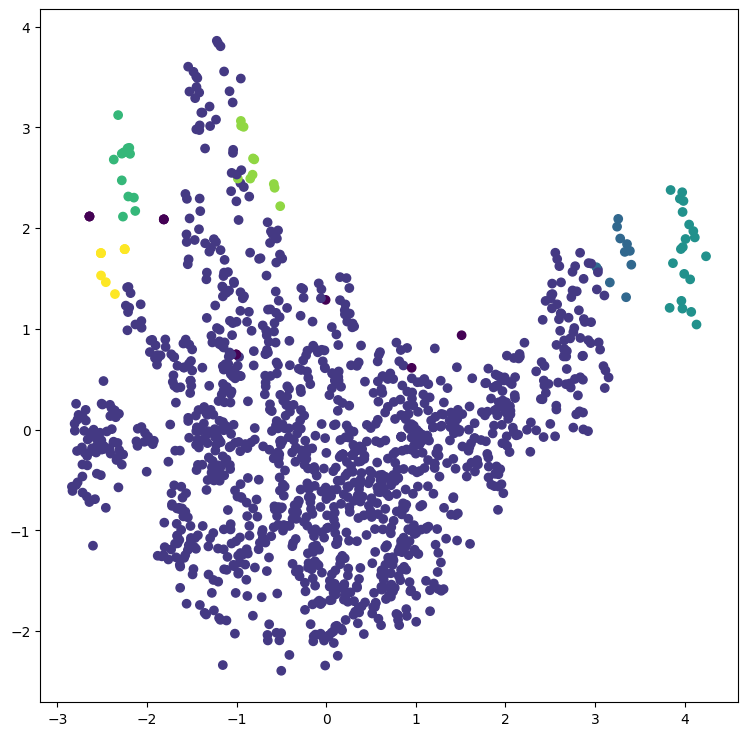

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm to the scaled data
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(X_scaled)

# Visualize the clusters in a 2D scatter plot using the first teo Principal Components
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(projection[:, 0], projection[:, 1], c=dbscan.labels_)

# Display the 2D plot
plt.show()

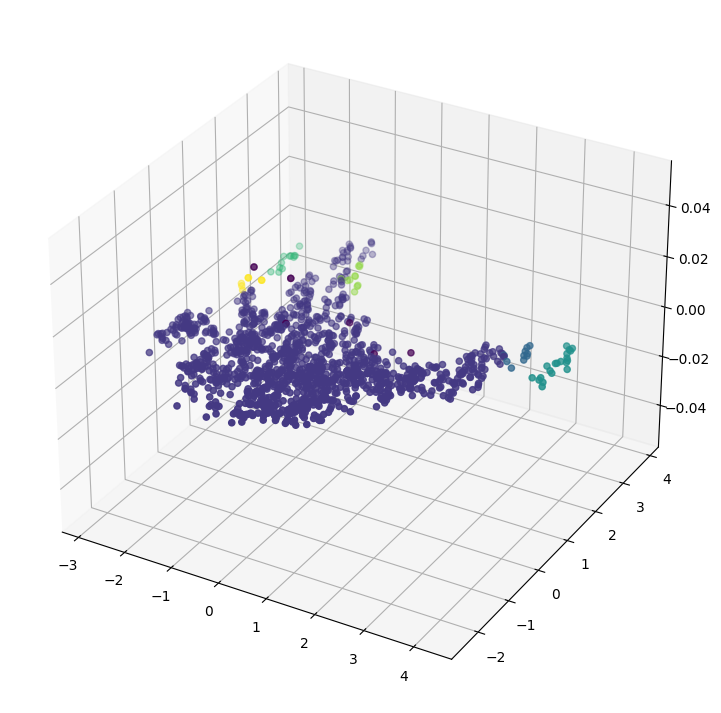

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm to the scaled data
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(X_scaled)

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:, 0], projection[:, 1], c=dbscan.labels_)

# Display the 3D plot
plt.show()

In [ ]:
print ("kmeans", normalized_mutual_info_score(kmeans_labels, y.flatten()))
print ("dbscan", normalized_mutual_info_score(dbscan.labels_, y.flatten()))

kmeans 0.010995258562412695
dbscan 0.07754063370446265


---

# 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN.

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed.

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


In [ ]:
print(f'Total observations: {df.shape[0]}')

# train_size = int(df.shape[0]*0.75)
train_size = 1000
print(f'Train set observations: {train_size}')

print(f'Test set observations: {df.shape[0] - train_size}')

X_train = X_scaled[:train_size, :]
X_test = X_scaled[train_size:, :]
y_train = y[:train_size]
y_test = y[train_size:]

Total observations: 1372
Train set observations: 1000
Test set observations: 372


## Logistic regression

Loss functions and gradient descent for the logistic regression and it's regularized versions

In [ ]:
def sigmoidM(X, w):
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

def SquareLoss(X, y, w):
    return LA.norm(y-X@w,2)

# no regularization
def LogisticLoss(X, labels, w):
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    return cost

def GDLogistic(X, labels, iter, gamma):
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = np.random.uniform(0, 0.01, d[1])  # Initialize w with random values
    W = np.zeros((2, iter))  # Create an array to store the weight vectors at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - (gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = LogisticLoss(X, labels, w)

    return W, cost

# ridge
def RidgeSquareLoss(X, y, w, lam):
    return LogisticLoss(X, y, w) + lam*LA.norm(w,2)

def RidgeGradient(w, lam):
    return 2*lam*w

def GDRidge(X, labels, iter, gamma, lam):
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = np.random.uniform(0, 0.01, d[1])  # Initialize w with random values
    W = np.zeros((4, iter))  # Create an array to store the weight vectors at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - ((gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)) + RidgeGradient(w, lam))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = RidgeSquareLoss(X, labels, w, lam)

    return W, cost

# lasso
def LassoSquareLoss(X, y, w, lam):
    return LogisticLoss(X, y, w) + lam*LA.norm(w,1)

def LassoGradient(w, lam):
    g = np.ones(w.shape)
    g[w < 0.] = -1.0
    return lam * g

def GDLasso(X, labels, iter, gamma, lam):
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = np.random.uniform(0, 0.01, d[1])  # Initialize w with random values
    W = np.zeros((4, iter))  # Create an array to store the weight vectors at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - ((gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)) + LassoGradient(w, lam))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = LassoSquareLoss(X, labels, w, lam)

    return W, cost

# elastic net
def ElasticNetSquareLoss(X, y, w, lr, l):
    return LogisticLoss(X, y, w) + lr * l * LA.norm(w, 1) + (1 - lr) * l * LA.norm(w, 2)

def ElasticNetGradient(X, y, w, lr, l, points):
    return (1 - lr) * RidgeGradient(w, l) + lr * LassoGradient(w, l)

def GDElasticNet(X, y, lr, l, iter, gamma):
    points = X.shape[0]
    d = X.shape[1]
    W = np.zeros((d, iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:, i] = w
        w = w - gamma * ElasticNetGradient(X, y, w, lr, l, points)
        L[i] = ElasticNetSquareLoss(X, y, w, lr, l)
    return W, L

### Without regularization

In [ ]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)

In [ ]:
# print("predictions: ", predictions)
# print("y test set: ", y_test)

# counting the number of different values between predictions and y_test values
differences_counter = len([i for i in range (len(predictions)) if predictions[i] != y_test[i]])
print(f'{differences_counter} different values between predictions and y_test values')

0 different values between predictions and y_test values


In [ ]:
print("Coefficients: ", LR.coef_)
print("Intercept: ", LR.intercept_)

Coefficients:  [[-4.62633371 -4.58543662 -4.20016601  0.16780798]]
Intercept:  [-1.56657179]


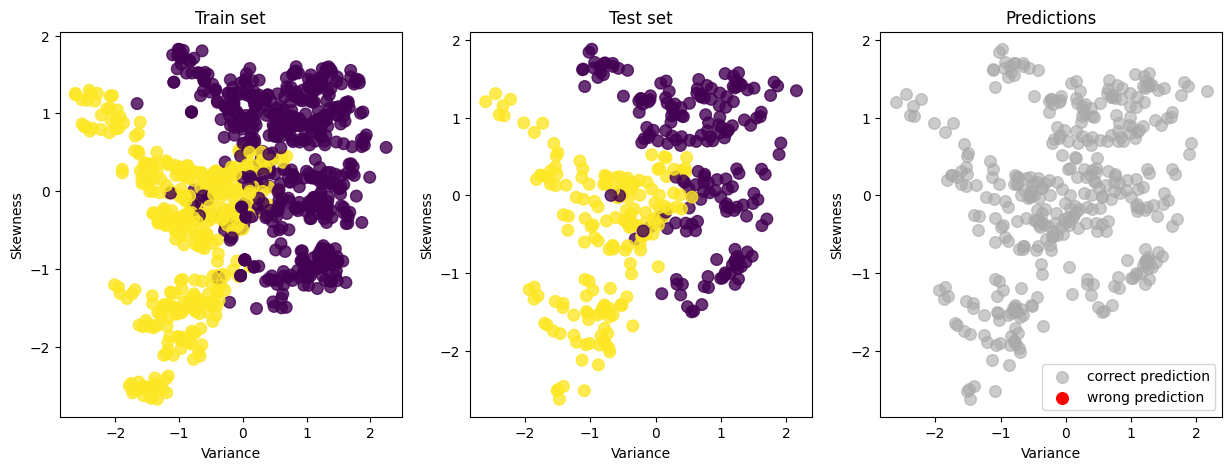

In [ ]:
# scatterplots
fig, ax = plt.subplots(1, 3)

ax[0].scatter(X_train[:, 0], X_train[:, 1], s=70, c=y_train, alpha=0.8)
ax[0].title.set_text("Train set")
ax[0].set_xlabel('Variance')
ax[0].set_ylabel('Skewness')

ax[1].scatter(X_test[:, 0], X_test[:, 1], s=70, c=y_test, alpha=0.8)
ax[1].title.set_text("Test set")
ax[1].set_xlabel('Variance')
ax[1].set_ylabel('Skewness')

correct = (predictions == y_test) # evaluate which predicions are correct
ax[2].scatter(X_test[correct == 1, 0], X_test[correct == 1, 1], c = 'darkgrey', s = 70, alpha = 0.6, marker = 'o')  # correct predictions
ax[2].scatter(X_test[correct == 0, 0], X_test[correct == 0, 1], c = 'red', s = 70, alpha = 1, marker = 'o') # wrong predictions
ax[2].legend(['correct prediction', 'wrong prediction'], loc='best')
ax[2].title.set_text("Predictions")
ax[2].set_xlabel('Variance')
ax[2].set_ylabel('Skewness')

fig.set_figwidth(15)
fig.set_figheight(5)
fig.show()

### $K$-fold Cross Validation

In [ ]:
def KFoldCVRLS(Xtr, ytr, K, lam, gamma):
    """
    Parameters
    ----------
    Xtr : matrix of float of dim n x d
        Dataset
    Ytr : array of float of dim n
        Ground truth values
    K : int
        Number of folds to split the data into
    lam : array of float
        Tuning hyperparameter under analysis
    """
    num_hpar = len(lam) # number of possible values for the hyperparameter
    points = Xtr.shape[0] # total training points
    fold_size = int(np.ceil(points/K)) # size of each K-fold
    # array containing the mean and std of the training error for each
    # hyperparameter accross all K runs of CV
    tr_mean = np.zeros(num_hpar)
    val_mean = np.zeros(num_hpar)
    # array containing the mean and std of the validation error for each
    # hyperparameter accross all K runs of CV
    tr_std = np.zeros(num_hpar)
    val_std = np.zeros(num_hpar)
    # random permutation of training data
    rand_idx = np.random.choice(points, size=points, replace=False)
    # train and validation loss for each of the K runs for each of the
    # possible hyperparameter values
    train_loss = np.zeros((num_hpar,K))
    val_loss = np.zeros((num_hpar,K))

    # loop across all hyperparameters values
    for l_idx, l in enumerate(lam):
        first = 0
        # K-fold CV runs
        for fold in range(K):
            # create a mask to distinguish train and validation set for this run
            flags = np.zeros(points)
            flags[first:first + fold_size] = 1;
            # construct the  training and validation set
            X = Xtr[rand_idx[flags==0]]
            y = ytr[rand_idx[flags==0]]
            X_val = Xtr[rand_idx[flags==1]]
            y_val = ytr[rand_idx[flags==1]]

            # compute the training error of the logistic regression
            W, L = GDLogistic(X, y, iter, gamma)
            train_loss[l_idx, fold] = L[-1]

            # compute the validation error of the logistic regression
            val_error = SquareLoss(X_val, y_val, W[:, -1])
            val_loss[l_idx, fold] = val_error

            # update the first position to select the next fold
            first = first + fold_size

        # summarize performance metrics
        tr_mean[l_idx] = np.mean(train_loss[l_idx,:])
        val_mean[l_idx] = np.mean(val_loss[l_idx,:])

        tr_std[l_idx] = np.std(train_loss[l_idx,:])
        val_std[l_idx] = np.std(val_loss[l_idx,:])

    best_par_idx = np.argmin(val_mean)
    best_par = lam[best_par_idx]

    return best_par, val_mean, val_std, tr_mean, tr_std

In [ ]:
K = 5
lam = np.linspace(0, 1, 50)
print('Lambda is chosen among: ', lam)

iter = 200
gamma = 0.1

best_par, val_mean, val_std, tr_mean, tr_std = KFoldCVRLS(X_train[:, 0:2], y_train, K, lam, gamma)
print('Best lambda: ', best_par)

Lambda is chosen among:  [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
Best lambda:  0.12244897959183673


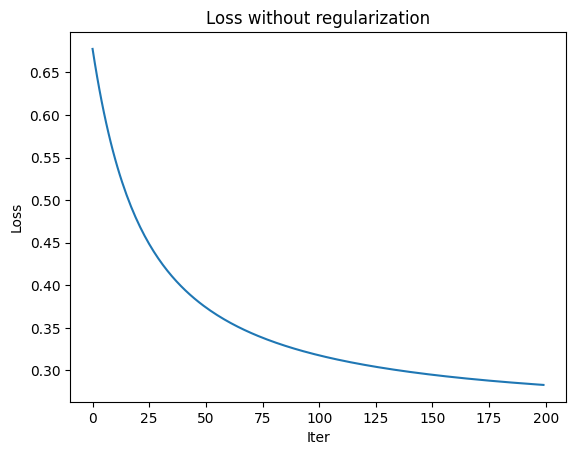

In [ ]:
W, cost = GDLogistic(X_test[:, [0, 1]], y_test, iter, gamma)

fig, ax = plt.subplots()
ax.plot(cost)
ax.set_title('Loss without regularization')
plt.xlabel('Iter')
plt.ylabel('Loss')
fig.show()

### Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

r_LR = Ridge(random_state=0).fit(X_train, y_train) # using Ridge regularization

predictions = r_LR.predict(X_test)
# print(predictions.round())

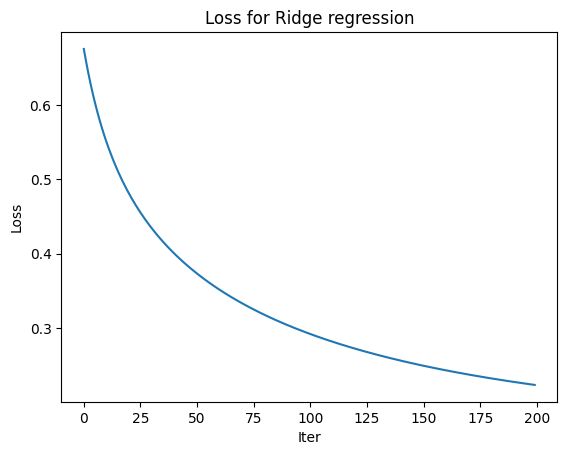

In [ ]:
iter = 200
gamma = 0.1
lam = 0.001

wgdR, L = GDRidge(X_test, y_test, iter, gamma, lam)
wpredR = wgdR[:,-1]

#print('L2 Norm of the Difference Between Ground Truth Weigths and Predicted Weights: ', LA.norm(w-wpredR,2))

plt.plot(L)
plt.title('Loss for Ridge regression')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

l_LR = Lasso(random_state=0).fit(X_train, y_train) # using Lasso regularization

predictions = l_LR.predict(X_test)
# print(predictions.round())

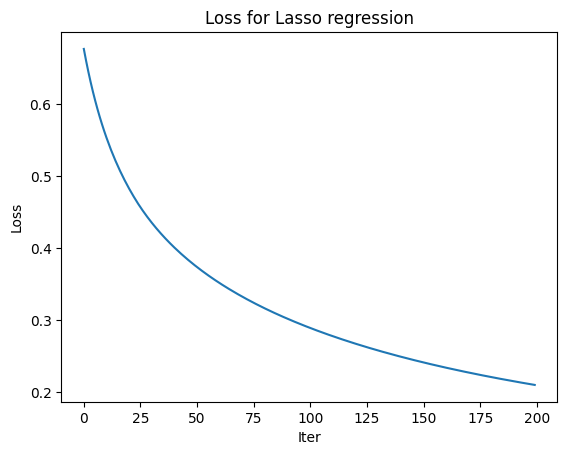

In [ ]:
iter = 200
gamma = 0.1
lam = 0.001

wgdL, L = GDLasso(X_test, y_test, iter, gamma, lam)
wpredL = wgdL[:,-1]

#print('L2 Norm of the Difference Between Ground Truth Weigths and Predicted Weights: ', LA.norm(w-wpredL,2))

plt.plot(L)
plt.title('Loss for Lasso regression')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

### Elastic Net regression

In [ ]:
from sklearn.linear_model import ElasticNet

en_LR = ElasticNet(random_state=0).fit(X_train, y_train) # using Elastic Net regularization

predictions = en_LR.predict(X_test)
# print(predictions.round())

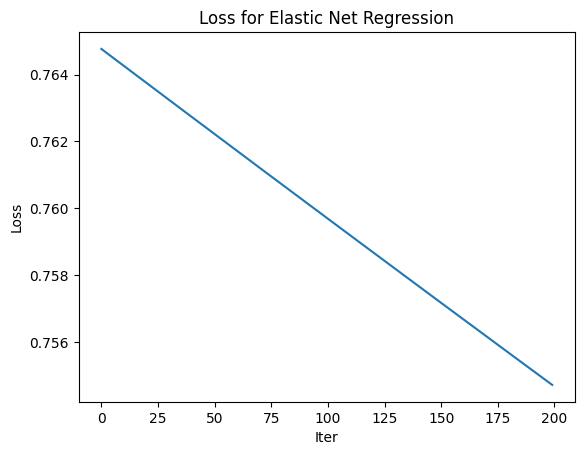

In [ ]:
iter = 200
gamma = 0.1
lam = 0.001
lr = 0.8

wgdE, L = GDElasticNet(X_test, y_test, lr, lam, iter, gamma)
wpredE = wgdL[:,-1]

#print('L2 Norm of the Difference Between Ground Truth Weigths and Predicted Weights: ', LA.norm(w-wpredE,2))

plt.plot(L)
plt.title('Loss for Elastic Net Regression')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

No regularization

In [ ]:
train_accuracy = accuracy_score(y_train, LR.predict(X_train).round())
print(f"Train set accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test, LR.predict(X_test).round())
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")

Train set accuracy: 97.90%
Test set accuracy: 100.00%


Ridge regression

In [ ]:
train_accuracy = accuracy_score(y_train, r_LR.predict(X_train).round())
print(f"Train set accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test, r_LR.predict(X_test).round())
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")

Train set accuracy: 97.10%
Test set accuracy: 99.19%


Lasso regression

In [ ]:
train_accuracy = accuracy_score(y_train, l_LR.predict(X_train).round())
print(f"Train set accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test, l_LR.predict(X_test).round())
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")

Train set accuracy: 56.80%
Test set accuracy: 52.15%


Elastic Net regression

In [ ]:
train_accuracy = accuracy_score(y_train, en_LR.predict(X_train).round())
print(f"Train set accuracy: {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test, en_LR.predict(X_test).round())
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")

Train set accuracy: 56.80%
Test set accuracy: 52.15%


### Model assessment

In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ['1', '0']

In [ ]:
y_pred = LR.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       194
           0       1.00      1.00      1.00       178

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



With L2 regularization (Ridge)

In [ ]:
y_pred_r = r_LR.predict(X_test)
print(classification_report(y_true, y_pred_r.round(), target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       194
           0       0.98      1.00      0.99       178

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372



With L1 regularization (Lasso)

In [ ]:
y_pred_l = l_LR.predict(X_test)
print(classification_report(y_true, y_pred_l.round(), target_names=target_names))

              precision    recall  f1-score   support

           1       0.52      1.00      0.69       194
           0       0.00      0.00      0.00       178

    accuracy                           0.52       372
   macro avg       0.26      0.50      0.34       372
weighted avg       0.27      0.52      0.36       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With L2 and L1 regularization (Elastic Net)

In [ ]:
y_pred_en = en_LR.predict(X_test)
print(classification_report(y_true, y_pred_en.round(), target_names=target_names))

              precision    recall  f1-score   support

           1       0.52      1.00      0.69       194
           0       0.00      0.00      0.00       178

    accuracy                           0.52       372
   macro avg       0.26      0.50      0.34       372
weighted avg       0.27      0.52      0.36       372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictions comparison

In [ ]:
# predictions comparison without rounding function
print('True values: ', y_true)
print('\nPredicted values: ', y_pred)
print('\nPredicted values (Ridge): ', y_pred_r)
print('\nPredicted values (Lasso): ', y_pred_l)
print('\nPredicted values (Elastic Net): ', y_pred_en)

True values:  [1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 0]

Predicted values:  [1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0

In [ ]:
# predictions comparison using rounding function
print('True values: ', y_true)
print('\nPredicted values: ', y_pred.round())
print('\nPredicted values (Ridge): ', y_pred_r.round())
print('\nPredicted values (Lasso): ', y_pred_l.round())
print('\nPredicted values (Elastic Net): ', y_pred_en.round())

True values:  [1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 0]

Predicted values:  [1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0

## Decision tree (using the ID3 algorithm)

In [ ]:
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]

In [ ]:
# compute H(S)
def entropy(train_data, label, class_list):
    """
    Calculate the entropy of a dataset.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.

    Returns
    -------
    total_entr : float
        The entropy of the dataset.
    """
    # Get the total number of instances in the dataset
    total_row = train_data.shape[0]
    # Initialize the total entropy variable
    total_entr = 0

    # Iterate through each possible class in the label
    for c in class_list:
        # Count the number of points belonging to the current class
        total_class_count = train_data[train_data[label] == c].shape[0]

        # Check if there are instances of the class to avoid numerical errors
        if total_class_count > 0:
            # Calculate the entropy of the current class
            total_class_entr = - (total_class_count / total_row) * np.log2(total_class_count / total_row)
            # Add the entropy of the current class to the total entropy of the dataset
            total_entr += total_class_entr

    # Return the calculated total entropy of the dataset
    return total_entr

# compute H(S_j)
def feature_entropy(left_data, right_data, label, class_list):
    """
    Calculate the conditional entropy of a dataset split by a specific feature.

    Parameters
    ----------
    left_data : DataFrame
        Subset of the dataset where the feature has a specific value.
    right_data : DataFrame
        Subset of the dataset where the feature has another value.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.

    Returns
    -------
    ent : float
        The conditional entropy of the dataset split by the feature.
    """
    # Get the total number of points considered after the split
    row_count = left_data.shape[0] + right_data.shape[0]

    # Calculate the probabilities of the left and right subsets
    p_left = left_data.shape[0] / row_count
    p_right = right_data.shape[0] / row_count

    # Calculate the conditional entropy using the weighted average of entropies for left and right subsets
    ent = p_left * entropy(left_data, label, class_list) + p_right * entropy(right_data, label, class_list)

    # Return the calculated conditional entropy
    return ent

In [ ]:
def split(feature_column, threshold):
    """
    Split the indices of data points based on a feature and a threshold.

    Parameters
    ----------
    feature_column : array-like
        The values of the feature for each data point.
    threshold : float
        The threshold value for splitting the data points.

    Returns
    -------
    left_rows : array-like
        Indices of data points where the feature value is less than or equal to the threshold.
    right_rows : array-like
        Indices of data points where the feature value is greater than the threshold.
    """
    # Find the indices of data points where the feature value is less than or equal to the threshold
    left_rows = np.argwhere(feature_column <= threshold).flatten()
    # Find the indices of data points where the feature value is greater than the threshold
    right_rows = np.argwhere(feature_column > threshold).flatten()

    # Return the indices for left and right subsets
    return left_rows, right_rows

In [ ]:
def information_gain(data, feature_name, label, class_list, threshold):
    """
    Calculate the information gain after splitting the dataset based on a feature and a threshold.

    Parameters
    ----------
    data : DataFrame
        The dataset.
    feature_name : str
        The name of the feature for which information gain is calculated.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.
    threshold : float
        The threshold value for splitting the dataset.

    Returns
    -------
    feat_information_gain : float
        The information gain achieved by splitting the dataset based on the specified feature and threshold.
    """
    # Split the dataset into left and right subsets based on the feature and threshold
    left_rows, right_rows = split(data[feature_name].values, threshold)

    # Check if either subset is empty; if so, information gain is zero
    if len(left_rows) == 0 or len(right_rows) == 0:
        return 0

    # Calculate the entropy of the split dataset
    feat_entropy = feature_entropy(data.iloc[left_rows], data.iloc[right_rows], label, class_list)

    return feat_entropy


In [ ]:
def get_split_thresholds(feature_column, n_thresholds):
    """
    Generate candidate split thresholds for a given feature column.

    Parameters
    ----------
    feature_column : array-like
        The values of the feature for each data point.
    n_thresholds : int
        The number of thresholds to generate.

    Returns
    -------
    thresholds : list of float
        List of candidate split thresholds for the feature column.
    """
    # Extract the values of the feature column
    feature_column = feature_column.values
    # Get the total number of data points
    n_data = len(feature_column)

    # Sort the feature column in ascending order
    sorted_column = np.sort(feature_column)

    # Check if there is more than one data point
    if len(feature_column) > 1:
        # Split the sorted feature column into n_thresholds + 1 partitions
        partitioned_array = np.array_split(sorted_column, n_thresholds + 1)

        # Calculate the midpoint between consecutive partitions as candidate thresholds
        thresholds = [(partitioned_array[i][-1] + partitioned_array[i + 1][0]) / 2 for i in range(len(partitioned_array) - 1)]
    else:
        # If there is only one data point, use it as the threshold
        thresholds = [feature_column[0]]

    # Return the list of candidate split thresholds
    return thresholds


In [ ]:
def most_informative_feature(train_data, label, class_list, n_thresholds):
    """
    Find the most informative feature and its corresponding threshold for splitting the dataset.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.
    n_thresholds : int
        The number of thresholds to generate for each feature.

    Returns
    -------
    min_entropy_feature : str
        The name of the most informative feature.
    min_entropy_threshold : float
        The corresponding threshold for splitting the dataset based on the most informative feature.
    """
    # Get the list of features excluding the label
    feature_list = train_data.columns.drop(label)

    # Initialize variables to store the minimum entropy and corresponding feature and threshold
    min_entropy = float('inf')
    min_entropy_feature = None
    min_entropy_threshold = None

    # Iterate over each feature in the feature list
    for feature in feature_list:
        # Generate candidate split thresholds for the current feature
        thresholds = get_split_thresholds(train_data[feature], n_thresholds)

        # Iterate over each threshold
        for t in thresholds:
            # Calculate information gain for the current feature and threshold
            info_gain = information_gain(train_data, feature, label, class_list, t)

            # Check if the calculated information gain is less than the current minimum entropy
            if info_gain < min_entropy:
                # Update the minimum entropy and corresponding feature and threshold
                min_entropy = info_gain
                min_entropy_feature = feature
                min_entropy_threshold = t

    # Return the most informative feature and its corresponding threshold
    return min_entropy_feature, min_entropy_threshold

In [ ]:
def is_leaf(train_data, label):
    """
    Check if a node in a decision tree is a leaf node.

    Parameters
    ----------
    train_data : DataFrame
        The dataset associated with the current node.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    bool
        True if the node is a leaf node (contains only one class), False otherwise.
    """
    # Get the unique classes in the current node
    classes_in_node = np.unique(train_data[label])

    # Check if there is only one class in the node
    if len(classes_in_node) == 1:
        # If there is only one class, the node is a leaf node
        return True
    else:
        # If there is more than one class, the node is not a leaf node
        return False

In [ ]:
def leaf_class(train_data, label):
    """
    Determine the class of a leaf node in a decision tree.

    Parameters
    ----------
    train_data : DataFrame
        The dataset associated with the leaf node.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    leaf_class : str
        The class label assigned to the leaf node.
    """
    # Get the unique classes and their counts in the current leaf node
    class_list, count_class = np.unique(train_data[label], return_counts=True)

    # Find the index of the class with the highest count (most frequent class)
    idx = count_class.argmax()

    # Return the class label associated with the most frequent class in the leaf node
    return class_list[idx]

In [ ]:
def make_tree(train_data, label, class_list, n_thresholds, cur_depth, min_samples, max_depth):
    """
    Recursively build a decision tree.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset associated with the current node.
    label : str
        The name of the column representing the class labels.
    class_list : list of str
        List of possible values of the class labels.
    n_thresholds : int
        The number of thresholds to generate for each feature.
    cur_depth : int
        The current depth of the decision tree.
    min_samples : int
        The minimum number of samples required to split a node.
    max_depth : int
        The maximum depth of the decision tree.

    Returns
    -------
    tree : dict or str
        The constructed decision tree represented as a nested dictionary. If a leaf node, returns the class label.
    """
    # Check stopping conditions for creating a leaf node
    if is_leaf(train_data, label) or cur_depth >= max_depth or len(train_data) <= min_samples:
        return leaf_class(train_data, label)
    else:
        # Increment the current depth for the next level of recursion
        cur_depth += 1

        # Find the most informative feature and its corresponding threshold for splitting
        split_feature, split_threshold = most_informative_feature(train_data, label, class_list, n_thresholds)

        # Split the dataset into left and right subsets based on the feature and threshold
        left_rows, right_rows = split(train_data[split_feature].values, split_threshold)

        # Check if either subset is empty; if so, create a leaf node
        if len(left_rows) == 0 or len(right_rows) == 0:
            return leaf_class(train_data, label)
        else:
            # Build the subtree
            split_condition = "{} <= {}".format(split_feature, split_threshold)
            sub_tree = {split_condition: []}

            # Recursive calls for the left and right branches
            left_branch = make_tree(train_data.iloc[left_rows], label, class_list, n_thresholds, cur_depth, min_samples, max_depth)
            right_branch = make_tree(train_data.iloc[right_rows], label, class_list, n_thresholds, cur_depth, min_samples, max_depth)

            # Check if both branches result in the same leaf class; if so, make the subtree a leaf
            if left_branch == right_branch:
                sub_tree = left_branch
            else:
                # Grow the tree by adding left and right branches to the split condition
                sub_tree[split_condition].append(left_branch)
                sub_tree[split_condition].append(right_branch)

            return sub_tree

In [ ]:
def id3(train_data_m, label, n_thresholds=1, min_samples=4, max_depth=6):
    """
    Build a decision tree using the ID3 algorithm.

    Parameters
    ----------
    train_data_m : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.
    n_thresholds : int, optional
        The number of thresholds to generate for each feature.
    min_samples : int, optional
        The minimum number of samples required to split a node.
    max_depth : int, optional
        The maximum depth of the decision tree.

    Returns
    -------
    tree : dict or str
        The constructed decision tree represented as a nested dictionary. If a leaf node, returns the class label.
    """
    # Create a copy of the training dataset
    train_data = train_data_m.copy()

    # Get the unique classes of the label
    class_list = train_data[label].unique()

    # Start the recursion by calling the make_tree function
    tree = make_tree(train_data, label, class_list, n_thresholds, 0, min_samples, max_depth)

    # Return the constructed decision tree
    return tree

In [ ]:
def predict(test_point, tree):
    """
    Predict the class label for a given test point using a decision tree.

    Parameters
    ----------
    test_point : Series
        The test point for which the class label is predicted.
    tree : dict or str
        The decision tree used for prediction.

    Returns
    -------
    prediction : str
        The predicted class label for the test point.
    """
    # Base case: if the tree is a leaf node (a class label)
    if not isinstance(tree, dict):
        return tree

    # Recursive case: traverse the tree based on feature values
    question = list(tree.keys())[0]
    attribute, value = question.split(" <= ")

    # Check the condition and follow the appropriate branch
    if test_point[attribute] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # Recursive call on the selected branch
    return predict(test_point, answer)


def evaluate_tree(tree, test_data, label):
    """
    Evaluate the accuracy of a decision tree on a test dataset.

    Parameters
    ----------
    tree : dict or str
        The decision tree to be evaluated.
    test_data : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    accuracy : float
        The accuracy of the decision tree on the test dataset.
    """
    correct_predict = 0
    wrong_predict = 0

    # Iterate over each row in the test dataset
    for index in range(len(test_data.index)):
        # Predict the class label for the current test point
        result = predict(test_data.iloc[index], tree)

        # Check if the predicted value matches the expected value
        if result == test_data[label].iloc[index]:
            correct_predict += 1  # Increase correct count
        else:
            wrong_predict += 1  # Increase incorrect count

    # Calculate and return the accuracy
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy

In [ ]:
tree = id3(train, 'class')
evaluate_tree(tree, test, 'class')

0.9543010752688172

## Naive Bayes

In [ ]:
def train_naive_bayes(train_data, label):
    """
    Parameters
    ----------
    train_data : matrix n_data x n_features
        Matrix containing the training dataset
    label : int
        Feature used as label
    """
    bayes_pi = {}
    bayes_tab = {}
    ntot = len(train_data.index)
    for cl in train_data[label].unique():  # for each possible value of the label
        fl = train_data[label]  # select training points in current class
        ncl = fl[fl==cl].shape[0]  # count number of points in current class
        pcl = ncl/ntot # proportion of points in current class (prior)
        bayes_pi[cl] = pcl
    for col in train_data.columns: # for each feature
        if (col != label):
            dd = pd.crosstab(train_data[label], train_data[col]) # frequency table
            a = np.sum(dd)  # total number of points belonging to a class
            b = np.sum(a[a.keys()!="?"])
            bayes_tab[col] = dd/b # likelihhod of each class

    return bayes_pi, bayes_tab

In [ ]:
# prediction and accuracy evaluation
def predict_naive_bayes(test_data, bayes_pi, bayes_tab, label):
    ntot = len(test_data.index)
    ncorrect = 0
    for j in range(ntot):
        prob = bayes_pi.copy()
        for col in test_data.columns:
            if (col != label):
                if ((test_data[col].iloc[j]!="?")&(test_data[col].iloc[j] in bayes_tab[col].keys())):
                    for cl in bayes_pi.keys():
                        prob[cl] = prob[cl]*bayes_tab[col][test_data[col].iloc[j]][cl]
        if (test_data[label].iloc[j] == max(prob, key=prob.get)):
            ncorrect = ncorrect + 1
    return (ncorrect/ntot) # accuracy

In [ ]:
pi, tab = train_naive_bayes(train, "class")
accuracy = predict_naive_bayes(test, pi, tab, "class")
print(accuracy)

0.5188172043010753


## Gaussian Naive Bayes

In [ ]:
def prior(train_data, label):
    """
    Calculate the log prior probabilities for each class in the dataset.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    priors : array-like
        The log prior probabilities for each class.
    """
    # Calculate the prior probabilities for each class
    priors = train_data.groupby(by=label).apply(lambda x: len(x) / len(train_data))

    # Return the log of the prior probabilities as an array
    return np.log(priors).values


def mean_variance(train_data, label):
    """
    Calculate the mean and variance for each feature in the dataset, grouped by class.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    mean : array-like
        The mean values for each feature and class.
    variance : array-like
        The variance values for each feature and class.
    """
    # Calculate the mean values for each feature and class
    mean = train_data.groupby(by=label).apply(lambda x: x.mean(axis=0))

    # Calculate the variance values for each feature and class
    variance = train_data.groupby(by=label).apply(lambda x: x.var(axis=0))

    # Return the mean and variance as arrays
    return (mean.values, variance.values)


def gaussian_density(mean, variance, point):
    """
    Calculate the Gaussian probability density for a given point.

    Parameters
    ----------
    mean : array-like
        The mean values for each feature and class.
    variance : array-like
        The variance values for each feature and class.
    point : array-like
        The values of the features for a given point.

    Returns
    -------
    density : array-like
        The Gaussian probability density for the given point.
    """
    # Calculate the Gaussian probability density for each feature
    d = (1 / np.sqrt(2*np.pi*variance)) * np.exp((-(point - mean)**2) / (2*variance))

    # Return the density as an array
    return d


def train_gaussian_naive_bayes(train_data, label):
    """
    Train a Gaussian Naive Bayes classifier.

    Parameters
    ----------
    train_data : DataFrame
        The training dataset.
    label : str
        The name of the column representing the class labels.

    Returns
    -------
    model : dict
        A dictionary containing the parameters of the trained Gaussian Naive Bayes model.
    """
    # Calculate the mean and variance for each feature and class
    mean, variance = mean_variance(train_data, label)

    # Calculate the log prior probabilities for each class
    priors = prior(train_data, label)

    # Get unique class labels and their count
    unique_labels = train_data[label].unique()
    n_labels = len(unique_labels)

    # Construct and return the Gaussian Naive Bayes model
    return {'n_labels': n_labels, 'unique_labels': unique_labels, 'n_classes': n_labels, 'mean': mean,
            'variance': variance, 'prior': priors}


In [ ]:
def posterior(point, mean, variance, class_list, n_classes, n_feat):
    """
    Calculate the log posterior probabilities for each class given a data point.

    Parameters
    ----------
    point : array-like
        The values of the features for a given data point.
    mean : array-like
        The mean values for each feature and class.
    variance : array-like
        The variance values for each feature and class.
    class_list : array-like
        The unique class labels.
    n_classes : int
        The number of classes.
    n_feat : int
        The number of features.

    Returns
    -------
    posteriors : array-like
        The log posterior probabilities for each class.
    """
    posteriors = []
    for i in range(n_classes):
        posterior = 0
        for j in range(n_feat):
            posterior += np.log(gaussian_density(mean[i][j], variance[i][j], point[j]))
        posteriors.append(posterior)
    return posteriors


def predict(test_data, label, gaus_bayes):
    """
    Predict the class labels for a given test dataset using a trained Gaussian Naive Bayes model.

    Parameters
    ----------
    test_data : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    gaus_bayes : dict
        A dictionary containing the parameters of the trained Gaussian Naive Bayes model.

    Returns
    -------
    predictions : array-like
        The predicted class labels for the test dataset.
    """
    predictions = []
    n_feat = len(test_data.columns) - 1
    for i in range(len(test_data)):
        pr = gaus_bayes['prior']
        post = posterior(test_data.iloc[i, :-1], gaus_bayes['mean'], gaus_bayes['variance'],
                         gaus_bayes['unique_labels'], gaus_bayes['n_classes'], n_feat)
        prob = pr + post
        max_prob_class_idx = np.argmax(prob)
        predictions.append(gaus_bayes['unique_labels'][max_prob_class_idx])
    return predictions


def evaluate_gaussian_naive_bayes(test_data, label, gaus_bayes):
    """
    Evaluate the accuracy of a Gaussian Naive Bayes model on a test dataset.

    Parameters
    ----------
    test_data : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    gaus_bayes : dict
        A dictionary containing the parameters of the trained Gaussian Naive Bayes model.

    Returns
    -------
    accuracy : float
        The accuracy of the Gaussian Naive Bayes model on the test dataset.
    """
    gaus_pred = predict(test_data, label, gaus_bayes)
    correct_predict = 0
    wrong_predict = 0
    for index in range(len(test_data.index)):
        if gaus_pred[index] == test_data[label].iloc[index]:
            correct_predict += 1
        else:
            wrong_predict += 1
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy

In [ ]:
gaus_bayes = train_gaussian_naive_bayes(train, 'class')
evaluate_gaussian_naive_bayes(test, 'class', gaus_bayes)

0.1774193548387097

## K-Nearest Neighbors Classification

In [ ]:
from scipy.spatial.distance import euclidean

def distance(point_one, point_two):
    """
    Calculate the Euclidean distance between two points.

    Parameters
    ----------
    point_one : array-like
        Coordinates of the first point.
    point_two : array-like
        Coordinates of the second point.

    Returns
    -------
    float
        Euclidean distance between the two points.
    """
    return euclidean(point_one, point_two)

def get_neighbors(train_set, test_point, label_col, n_neighbors):
    """
    Get the nearest neighbors of a test point in the training set.

    Parameters
    ----------
    train_set : array-like
        The training set containing data points.
    test_point : array-like
        The test point for which neighbors are to be found.
    label_col : array-like
        The labels corresponding to the training set.
    n_neighbors : int
        The number of neighbors to retrieve.

    Returns
    -------
    ordered_train : array-like
        The nearest neighbors in the training set.
    ordered_label : array-like
        The corresponding labels of the nearest neighbors.
    """
    # Calculate distances between the test point and all points in the training set
    dist = np.array([distance(train_point, test_point) for train_point in train_set])
    # Get indices that would sort the distances in ascending order
    idx_dist = dist.argsort()
    # Order the training set and labels based on the sorted distances
    ordered_train = train_set[idx_dist, :]
    ordered_label = label_col[idx_dist]
    # Return the top n_neighbors neighbors and their labels
    return ordered_train[:n_neighbors], ordered_label[:n_neighbors]

def predict(train_set, test_point, labels, n_neighbors):
    """
    Predict the label of a test point using k-nearest neighbors.

    Parameters
    ----------
    train_set : array-like
        The training set containing data points.
    test_point : array-like
        The test point for which the label is to be predicted.
    labels : array-like
        The labels corresponding to the training set.
    n_neighbors : int
        The number of neighbors to consider for the prediction.

    Returns
    -------
    predicted_label : array-like
        The predicted label for the test point.
    """
    # Get the nearest neighbors and their labels
    neigh, neigh_label = get_neighbors(train_set, test_point, labels, n_neighbors)
    # Count occurrences of each label among the neighbors
    values, counts = np.unique(neigh_label, return_counts=True)
    # Find the label with the highest count (majority class)
    idx = np.argmax(counts)
    # Return the predicted label
    return values[idx]

def evaluate_knn(train_set, test_set, label, n_neighbors=2):
    """
    Evaluate the accuracy of k-nearest neighbors algorithm on a test set.

    Parameters
    ----------
    train_set : DataFrame
        The training dataset.
    test_set : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    n_neighbors : int, optional
        The number of neighbors to consider for the prediction. Default is 2.

    Returns
    -------
    accuracy : float
        The accuracy of the k-nearest neighbors algorithm on the test set.
    """
    # Initialize counters for correct and incorrect predictions
    correct_predict = 0
    wrong_predict = 0
    # Extract labels and features from the training and test sets
    train_labels = train_set[label].values
    train_set = train_set.drop(label, axis=1)
    test_labels = test_set[label].values
    test_set = test_set.drop(label, axis=1)

    # Iterate through each row in the test dataset
    for index in range(len(test_set.index)):
        # Predict the class label for the current test row
        result = predict(train_set.values, test_set.iloc[index].values, train_labels, n_neighbors)
        # Check if the predicted value matches the actual value
        if result == test_labels[index]:
            # Increase the correct prediction count
            correct_predict += 1
        else:
            # Increase the incorrect prediction count
            wrong_predict += 1

    # Calculate and return the accuracy
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy


In [ ]:
knn_accuracy = evaluate_knn(train, test, 'class')
knn_accuracy

1.0